# Using Pandas for Time series

Source: https://tomaugspurger.github.io/modern-7-timeseries

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa

In [4]:
gs = web.DataReader("GS", data_source='yahoo', start='2006-01-01',
                    end='2010-01-01')
gs.head().round(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.44,124.23,126.70,128.87,6188700.0,108.23
2006-01-04,128.91,126.38,127.35,127.09,4861600.0,106.74
2006-01-05,127.32,125.61,126.00,127.04,3717400.0,106.70
2006-01-06,129.25,127.29,127.29,128.84,4319600.0,108.21
2006-01-09,130.62,128.00,128.50,130.39,4723500.0,109.51


In [5]:
gs.index[0]

Timestamp('2006-01-03 00:00:00')

In [6]:
gs.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.696220
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,108.207947
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,109.509758


In [8]:
gs.loc["2006"].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.696220
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,108.207947
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,109.509758


In [9]:
gs.resample("5d").mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,128.730001,125.877501,126.834999,127.959997,4.771825e+06,107.468870
2006-01-08,132.645000,130.205002,130.349998,131.660000,4.664300e+06,110.576382
2006-01-13,133.395004,131.244995,131.510002,132.924995,3.258250e+06,111.638783
2006-01-18,133.853333,131.656667,132.210002,132.543335,4.997767e+06,111.387131
2006-01-23,136.083997,133.310001,133.771997,135.153998,3.968500e+06,113.723325


In [10]:
gs.resample("5W").agg(["mean", "sum"]).head()

High                      Low                     Open  \
                  mean          sum        mean          sum        mean   
Date                                                                       
2006-01-08  128.730001   514.920006  125.877501   503.510002  126.834999   
2006-02-12  137.738750  3305.729996  135.133750  3243.210007  135.886667   
2006-03-19  145.639584  3495.350006  142.915831  3429.979950  144.235001   
2006-04-23  160.040420  3840.970078  157.057917  3769.390015  158.087916   
2006-05-28  158.530400  3963.260010  154.512399  3862.809982  157.042402   

                              Close                     Volume               \
                    sum        mean          sum          mean          sum   
Date                                                                          
2006-01-08   507.339996  127.959997   511.839989  4.771825e+06   19087300.0   
2006-02-12  3261.279999  136.628333  3279.080002  4.193379e+06  100641100.0   
2006-03-19  3461.640015  144.399166  3465.579987  3.842721e+06   92225300.0   
2006-04-23  3794.109985  158.730833  3809.539993  4.240908e+06  101781800.0   
2006-05-28  3926.060043  156.237999  3905.949982  4.730056e+06  118251400.0   

             Adj Close               
                  mean          sum  
Date                                 
2006-01-08  107.468870   429.875481  
2006-02-12  114.894530  2757.468712  
2006-03-19  121.502521  2916.060501  
2006-04-23  133.573778  3205.770683  
2006-05-28  131.737671  3293.441772

In [11]:
gs.resample("6H").mean().head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 00:00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167


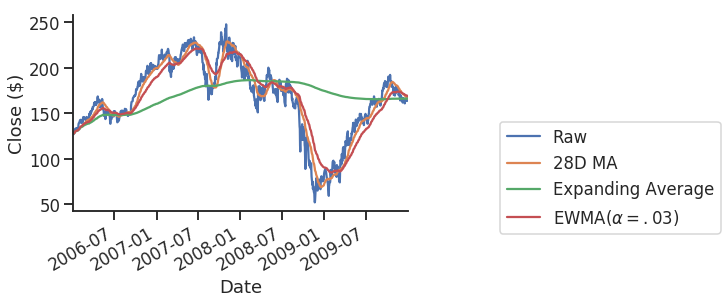

In [23]:
gs["Close"].plot(label='Raw')
gs["Close"].rolling(28).mean().plot(label='28D MA')
gs["Close"].expanding().mean().plot(label='Expanding Average')
gs["Close"].ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
# plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

In [24]:
roll = gs["Close"].rolling(30, center=True)
roll

Rolling [window=30,center=True,axis=0]

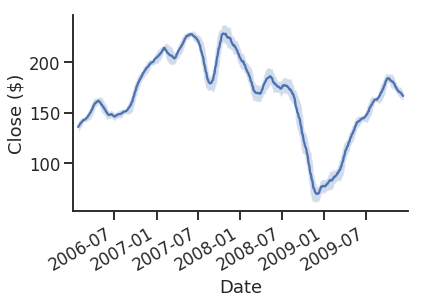

In [25]:
m = roll.agg(["mean", "std"])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                alpha=.25)
# plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

In [27]:
gs.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [26]:
gs.index + pd.DateOffset(months=3, days=-2)

DatetimeIndex(['2006-04-01', '2006-04-02', '2006-04-03', '2006-04-04',
               '2006-04-07', '2006-04-08', '2006-04-09', '2006-04-10',
               '2006-04-11', '2006-04-15',
               ...
               '2010-03-15', '2010-03-16', '2010-03-19', '2010-03-20',
               '2010-03-21', '2010-03-22', '2010-03-26', '2010-03-27',
               '2010-03-28', '2010-03-29'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [28]:
from pandas.tseries.holiday import USColumbusDay
USColumbusDay.dates('2015-01-01', '2020-01-01')

DatetimeIndex(['2015-10-12', '2016-10-10', '2017-10-09', '2018-10-08',
               '2019-10-14'],
              dtype='datetime64[ns]', freq='WOM-2MON')

In [29]:
# tz naiive -> tz aware..... to desired UTC
gs.tz_localize('US/Eastern').tz_convert('UTC').head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03 05:00:00+00:00,129.440002,124.230003,126.699997,128.869995,6188700.0,108.233147
2006-01-04 05:00:00+00:00,128.910004,126.379997,127.349998,127.089996,4861600.0,106.738167
2006-01-05 05:00:00+00:00,127.320000,125.610001,126.000000,127.040001,3717400.0,106.696220
2006-01-06 05:00:00+00:00,129.250000,127.290001,127.290001,128.839996,4319600.0,108.207947
2006-01-09 05:00:00+00:00,130.619995,128.000000,128.500000,130.389999,4723500.0,109.509758


# Modeling time series

In [4]:
df = pd.read_csv("../data/gas-prices-2004-2019.tsv", sep="\t")
df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [5]:
gas_sp = df[(df["PRODUTO"]=="GASOLINA COMUM") & (df["ESTADO"]=="SAO PAULO")][["DATA FINAL", "PREÇO MÉDIO REVENDA"]]

In [9]:
gas_sp["DATA FINAL"] = pd.to_datetime(gas_sp["DATA FINAL"], format="%Y-%m-%d")
gas_sp = gas_sp.rename(columns={"DATA FINAL": "date", "PREÇO MÉDIO REVENDA": "price"})
gas_sp.head()

,date,price
12087,2004-05-15,1.891
12114,2004-05-22,1.888
12141,2004-05-29,1.894
12168,2004-06-05,1.912
12195,2004-06-12,1.919


In [11]:
gas_sp = gas_sp.set_index("date")

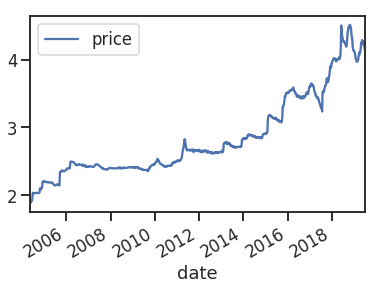

In [13]:
gas_sp.plot()

In [25]:
y = gas_sp.resample("MS").mean()["price"]
y.head()

date
2004-05-01    1.89100
2004-06-01    1.95625
2004-07-01    2.03060
2004-08-01    2.03375
2004-09-01    2.03225
Freq: MS, Name: price, dtype: float64

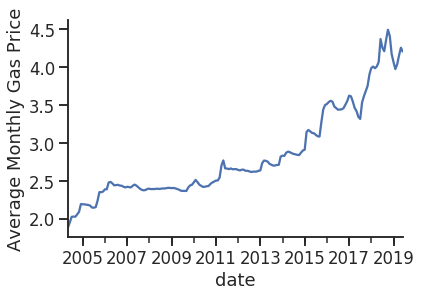

In [26]:
ax = y.plot()
ax.set(ylabel="Average Monthly Gas Price")
sns.despine()

In [27]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [28]:
X = (pd.concat([y.shift(i) for i in range(6)], axis=1,
               keys=['y'] + ['L%s' % i for i in range(1, 6)])
       .dropna())
X.head()

,y,L1,L2,L3,L4,L5
date,,,,,,
2004-10-01,2.06280,2.03225,2.03375,2.03060,1.95625,1.89100
2004-11-01,2.09675,2.06280,2.03225,2.03375,2.03060,1.95625
2004-12-01,2.19825,2.09675,2.06280,2.03225,2.03375,2.03060
2005-01-01,2.19700,2.19825,2.09675,2.06280,2.03225,2.03375
2005-02-01,2.19450,2.19700,2.19825,2.09675,2.06280,2.03225


In [29]:
mod_lagged = smf.ols('y ~ trend + L1 + L2 + L3 + L4 + L5',
                     data=X.assign(trend=np.arange(len(X))))
res_lagged = mod_lagged.fit()
res_lagged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     3406.
Date:                Fri, 31 Jan 2020   Prob (F-statistic):          2.93e-174
Time:                        14:43:03   Log-Likelihood:                 263.84
No. Observations:                 177   AIC:                            -513.7
Df Residuals:                     170   BIC:                            -491.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0521      0.035      1.504      0.134      -0.016       0.120
trend          0.0003      0.000      1.721      0.087   -5.06e-05       0.001
L1             1.3540      0.077     17.570      0.000       1.202       1.506
L2            -0.5718      0.130     -4.386      0.000      -0.829      -0.314
L3             0.1863      0.137      1.363      0.175      -0.083       0.456
L4             0.0291      0.130      0.223      0.824      -0.228       0.286
L5            -0.0230      0.078     -0.295      0.768      -0.177       0.131
==============================================================================
Omnibus:                       65.952   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              396.791
Skew:                           1.227   Prob(JB):                     6.88e-87
Kurtosis:                       9.912   Cond. No.                     4.95e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

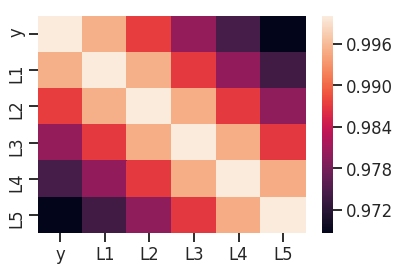

In [30]:
sns.heatmap(X.corr());

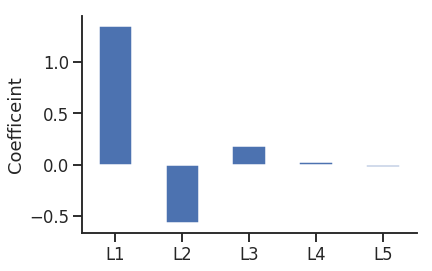

In [31]:
ax = res_lagged.params.drop(['Intercept', 'trend']).plot.bar(rot=0)
plt.ylabel('Coefficeint')
sns.despine()

In [32]:
# `Results.resid` is a Series of residuals: y - ŷ
mod_trend = sm.OLS.from_formula(
    'y ~ trend', data=y.to_frame(name='y')
                       .assign(trend=np.arange(len(y))))
res_trend = mod_trend.fit()

In [33]:
def tsplot(y, lags=None, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7108a23e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f71089fc9b0>)

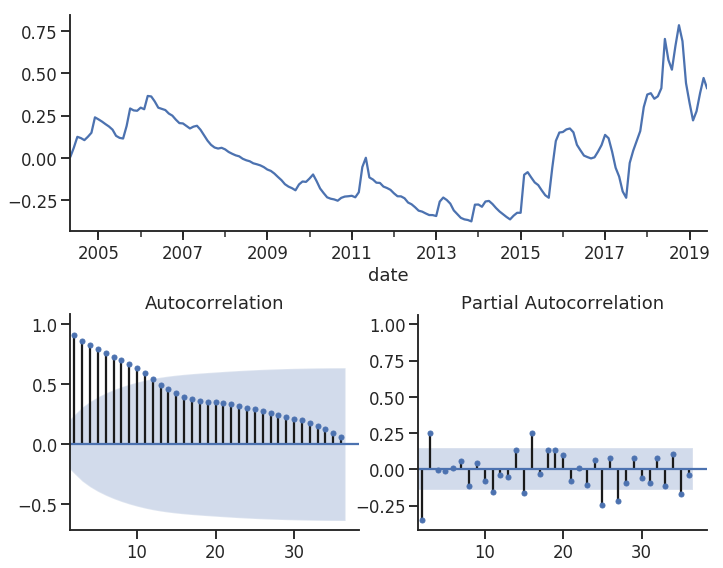

In [35]:
tsplot(res_trend.resid, lags=36)

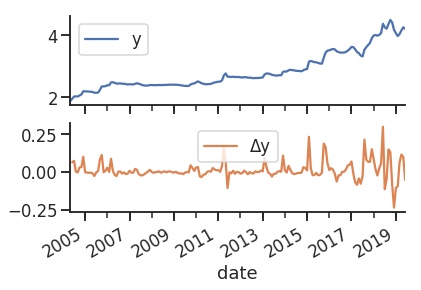

In [36]:
y.to_frame(name='y').assign(Δy=lambda x: x.y.diff()).plot(subplots=True)
sns.despine()

In [37]:
from collections import namedtuple

ADF = namedtuple("ADF", "adf pvalue usedlag nobs critical icbest")

In [38]:
ADF(*smt.adfuller(y))._asdict()

OrderedDict([('adf', 0.312768762627053),
             ('pvalue', 0.9779227847361422),
             ('usedlag', 2),
             ('nobs', 179),
             ('critical',
              {'1%': -3.4674201432469816,
               '5%': -2.877826051844538,
               '10%': -2.575452082332012}),
             ('icbest', -480.9235574832778)])

In [39]:
ADF(*smt.adfuller(y.diff().dropna()))._asdict()

OrderedDict([('adf', -9.718197514675088),
             ('pvalue', 9.701639617673641e-17),
             ('usedlag', 1),
             ('nobs', 179),
             ('critical',
              {'1%': -3.4674201432469816,
               '5%': -2.877826051844538,
               '10%': -2.575452082332012}),
             ('icbest', -478.9132965883043)])

In [40]:
data = (y.to_frame(name='y')
         .assign(Δy=lambda df: df.y.diff())
         .assign(LΔy=lambda df: df.Δy.shift()))
mod_stationary = smf.ols('Δy ~ LΔy', data=data.dropna())
res_stationary = mod_stationary.fit()

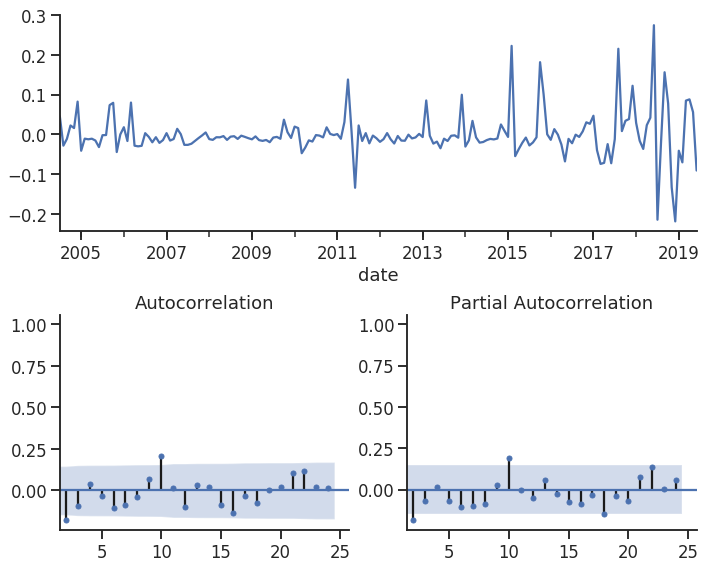

In [41]:
tsplot(res_stationary.resid, lags=24);

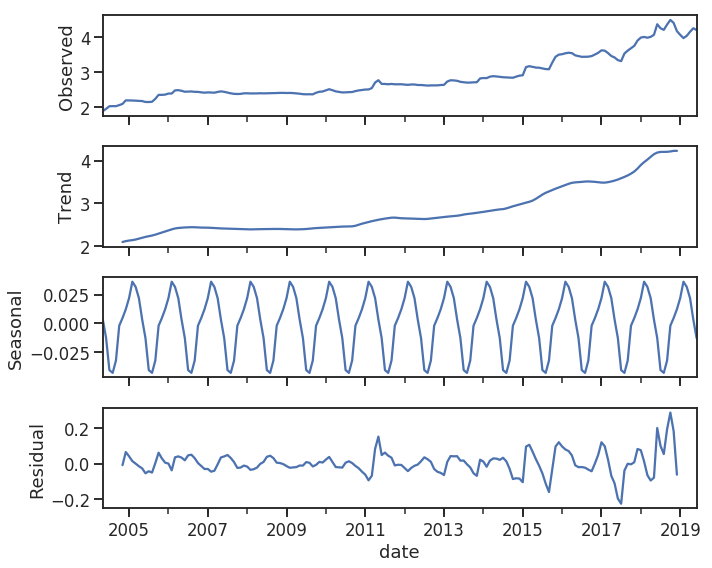

In [50]:
plt.rcParams["figure.figsize"] = [10, 8]
smt.seasonal_decompose(y).plot();

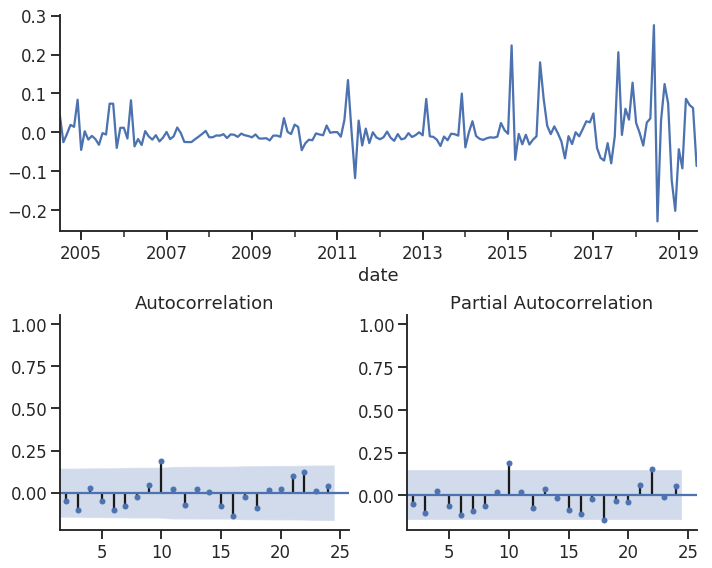

In [118]:
mod = smt.SARIMAX(y, trend='c', order=(1, 1, 1))
res = mod.fit()
tsplot(res.resid[2:], lags=24);

In [52]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  price   No. Observations:                  182
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 268.084
Date:                Fri, 31 Jan 2020   AIC                           -528.169
Time:                        14:49:07   BIC                           -515.375
Sample:                    05-01-2004   HQIC                          -522.982
                         - 06-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0131      0.007      1.841      0.066      -0.001       0.027
ar.L1         -0.0300      0.142     -0.211      0.833      -0.309       0.249
ma.L1          0.4052      0.136      2.983      0.003       0.139       0.671
sigma2         0.0030      0.000     18.649      0.000       0.003       0.003
===================================================================================
Ljung-Box (Q):                       47.52   Jarque-Bera (JB):               470.28
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               9.64   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
mod_seasonal = smt.SARIMAX(y, trend='c',
                           order=(1, 1, 4), seasonal_order=(0, 1, 2, 12),
                           simple_differencing=False)
res_seasonal = mod_seasonal.fit()

In [151]:
res_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              price   No. Observations:                  182
Model:             SARIMAX(1, 1, 4)x(0, 1, 2, 12)   Log Likelihood                 234.257
Date:                            Fri, 31 Jan 2020   AIC                           -450.513
Time:                                    15:22:06   BIC                           -422.344
Sample:                                05-01-2004   HQIC                          -439.082
                                     - 06-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0006      0.001      0.826      0.409      -0.001       0.002
ar.L1          0.4263      0.834      0.511      0.609      -1.209       2.061
ma.L1         -0.0743      0.838     -0.089      0.929      -1.717       1.569
ma.L2         -0.2509      0.279     -0.899      0.369      -0.798       0.296
ma.L3         -0.1161      0.123     -0.942      0.346      -0.358       0.126
ma.L4         -0.0070      0.137     -0.051      0.959      -0.275       0.261
ma.S.L12      -1.0652      0.891     -1.196      0.232      -2.811       0.681
ma.S.L24       0.0774      0.142      0.545      0.586      -0.201       0.356
sigma2         0.0030      0.003      1.102      0.271      -0.002       0.008
===================================================================================
Ljung-Box (Q):                       39.44   Jarque-Bera (JB):               464.26
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               9.08   Skew:                             1.21
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

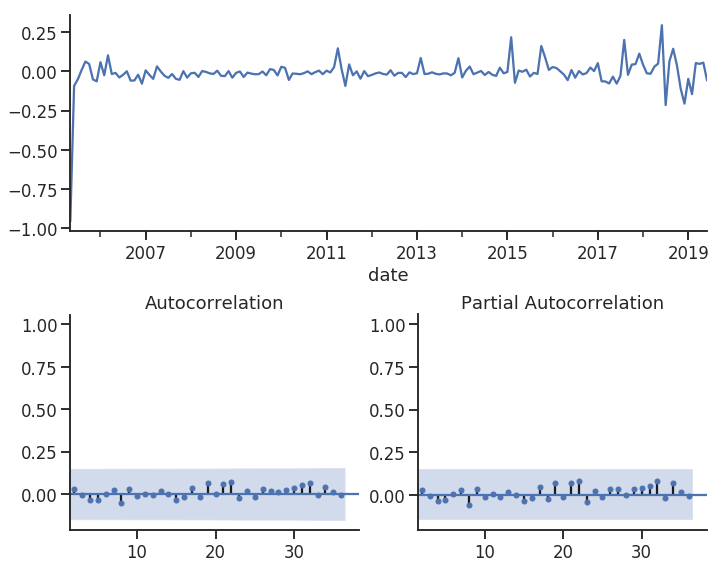

In [152]:
tsplot(res_seasonal.resid[12:], lags=36);

In [153]:
pred = res_seasonal.get_prediction(start='2007-01-01')
pred_ci = pred.conf_int()

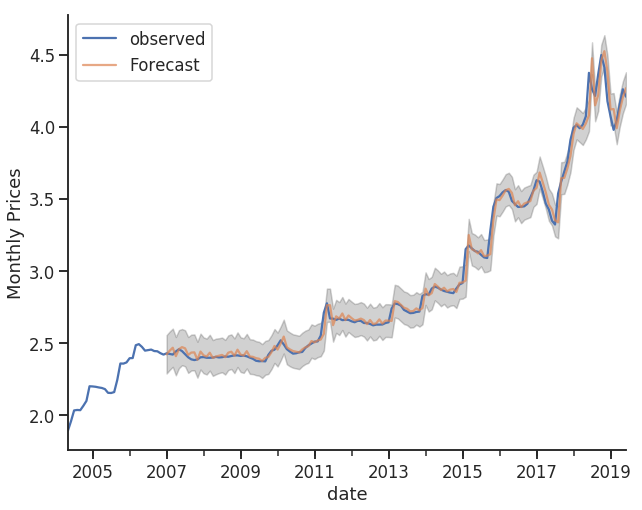

In [154]:
ax = y.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_ylabel("Monthly Prices")
plt.legend()
sns.despine()

In [157]:
pred_dy = res_seasonal.get_prediction(start='2007-01-01', dynamic='2016-01-01')
pred_dy_ci = pred_dy.conf_int()

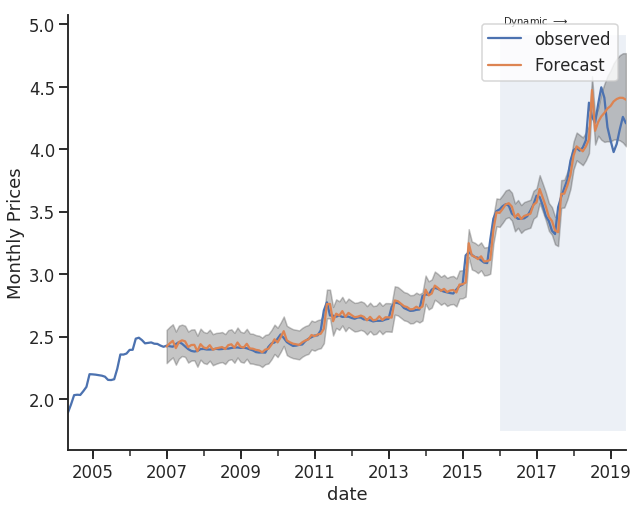

In [159]:
ax = y.plot(label='observed')
pred_dy.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_dy_ci.index,
                pred_dy_ci.iloc[:, 0],
                pred_dy_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_ylabel("Monthly Prices")

# Highlight the forecast area
ax.fill_betweenx(ax.get_ylim(), pd.Timestamp('2016-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)
ax.annotate('Dynamic $\\longrightarrow$', (pd.Timestamp('2016-02-01'), 5))

plt.legend()
sns.despine()